[[0.29440866 0.03294131 0.01506198 0.25304271]
 [0.50840582 0.0450775  0.7318145  0.66137413]
 [0.28015956 0.98867777 0.26003339 0.038888  ]
 [0.910951   0.83730403 0.2547701  0.22596742]
 [0.44909194 0.19152981 0.71315723 0.16043713]
 [0.19987667 0.96030595 0.74375857 0.55110892]
 [0.74920571 0.2761519  0.97095686 0.40401219]
 [0.24799111 0.19257533 0.07847385 0.54178727]
 [0.76273472 0.84309876 0.42922615 0.42629099]
 [0.18615707 0.84879245 0.04190887 0.30147913]
 [0.30583001 0.07434942 0.57267397 0.80377811]
 [0.0897753  0.49269407 0.20300495 0.65048279]
 [0.78608202 0.90136179 0.84790005 0.18726973]
 [0.86397593 0.80806431 0.01077682 0.49462788]
 [0.69156974 0.82992101 0.46528631 0.39117377]
 [0.5738811  0.14028125 0.39977986 0.01337061]
 [0.37175757 0.67431716 0.00595206 0.65270581]
 [0.86624188 0.19257622 0.58017386 0.24655223]
 [0.73324243 0.50271092 0.48627908 0.67460441]
 [0.30317804 0.06883532 0.94188031 0.79793116]
 [0.07583926 0.8579204  0.06424692 0.06999502]
 [0.76126784 

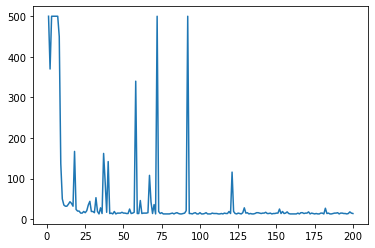

In [3]:
#SARSA
import numpy as np
import matplotlib.pyplot as plt

episode=200 #エピソード数
alfa= 0.1   #学習係数
upsilon=0.1#ε-greedy法
gamma=0.95  #割引率
action=4  #アクション数
state=0  #状態数
reward=0   #報酬
Cum_step=[]
Epi_num=list(np.arange(1,episode+1))
#迷路の定義
Next = [[0, 1, 5, 0], [1, 2, 1, 0], [2, 3, 2, 1], [3, 4, 8, 2], [4, 4, 9, 3],
[0, 5, 10, 5], [6, 7, 11, 6], [2, 7, 12, 6], [3, 8, 13, 8], [4, 9, 14, 9],
[5, 10, 15, 10], [6, 11, 16, 11], [7, 12, 17, 12], [8, 13, 18, 13],
[9, 14, 19, 14], [10, 15, 20, 15], [11, 16, 21, 16], [12, 17, 22, 17],
[13, 18, 18, 18], [14, 19, 19, 19],[15, 21, 20, 20], [16, 21, 21, 20],
[17, 23, 22, 22], [23, 24, 23, 22], [0, 0, 0, 0]]

#Q(s, a)をランダム値で初期化する.
Q=np.random.rand(25,4)
print(Q)
def cal_Q(s,a,r,s1,a1):
    action=np.argmax(Q[s])
    Q[s][a]+=alfa*(r+(gamma*Q[s1][a1]-Q[s][a]))
    return Q[s][a]

def choose_action(s):
    global Q
    action=np.argmax(Q[s])
    if(upsilon>np.random.rand()):
        action=np.random.randint(0,4)
    return action

#ループ0
for i in range(episode):
    state=0                              #状態を初期状態にセット
    #アクションの選択
    action=choose_action(state)
    
    #1ステップ前の状態、アクションを記憶
    pre_state=state            
    pre_action=action
    step=0                               #カウンターリセット
    
    #ループ1
    while(1):  
        state=Next[state][action]        #状態の更新
        
        #条件1
        if(step>=500):
            state=0
            reward=-10
            Q[pre_state][pre_action]=cal_Q(pre_state,pre_action,reward,state,action) 
            break
        
        #条件2
        if(state==24):
            reward=10
            state=0
            Q[pre_state][pre_action]=cal_Q(pre_state,pre_action,reward,state,action) 
            break
        
        #状態が変化しないとき
        if(state==pre_state):
            reward=-1
            
        #状態が変化するとき
        else:
            reward=0
        pre_action=action                #アクションの記憶
        action=choose_action(state)      #アクション選択
        Q[pre_state][pre_action]=cal_Q(pre_state,pre_action,reward,state,action) #Q値の更新
        pre_state=state                  #状態数の記憶
        step+=1
    Cum_step.append(step)
    print(Cum_step)

plt.plot(Epi_num,Cum_step)
    



In [2]:
#Q学習　SARSAのcal_Qの関数を以下に変更
def cal_Q(s,a,r,s1,a1):
    max_q=max(Q[s1])
    Q[s][a]+=alfa*(r+gamma*max_q-Q[s][a])
    return Q[s][a]